# Underfitting y Overfitting
**Sobreajuste y subajuste**

## Experimentando con diferentes modelos

Ahora que tenemos una forma confiable de medir la precisión del modelo, podemos experimentar con modelos alternativos y ver cuál da las mejores predicciones. Pero, ¿qué alternativas tenemos para los modelos?

Podemos ver en la [documentación](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) de scikit-learn que el modelo de árbol de decisión tiene muchas opciones (más de las que querríamos o necesitaríamos por mucho tiempo). Las opciones más importantes determinan la profundidad del árbol. Recordemos que la profundidad de un árbol es una medida de cuántas divisiones realiza antes de llegar a una predicción. Este es un árbol relativamente poco profundo.


<img src="./img/tree3.png" alt="arbol" width="600" />

---

En la práctica, no es raro que un árbol tenga 10 divisiones entre el nivel superior (todas las casas) y una hoja. A medida que el árbol se profundiza, el conjunto de datos se divide en hojas con menos casas. Si un árbol solo tuviera 1 división, dividiría los datos en 2 grupos. Si cada grupo se divide nuevamente, obtendríamos 4 grupos de casas. Dividiendo cada uno de esos nuevamente, crearíamos 8 grupos. Si seguimos duplicando el número de grupos añadiendo más divisiones en cada nivel, tendríamos 1024 grupos de casas para cuando lleguemos al nivel 10. Eso son 1024 hojas.

Cuando dividimos las casas entre muchas hojas, también tenemos menos casas en cada hoja. Las hojas con muy pocas casas harán predicciones que son bastante cercanas a los valores reales de esas casas, pero pueden hacer predicciones muy poco fiables para nuevos datos (porque cada predicción se basa en solo unas pocas casas).

Este es un fenómeno llamado sobreajuste, donde un modelo se ajusta casi perfectamente a los datos de entrenamiento, pero tiene un rendimiento deficiente en la validación y otros datos nuevos. Por otro lado, si hacemos nuestro árbol muy poco profundo, no divide las casas en grupos muy distintos.

En un extremo, si un árbol divide las casas en solo 2 o 4 grupos, cada grupo todavía tiene una gran variedad de casas. Las predicciones resultantes pueden estar muy lejos para la mayoría de las casas, incluso en los datos de entrenamiento (y también serán malas en la validación por la misma razón).

> El sobreajuste ocurre cuando un modelo se ajusta demasiado bien a los datos de entrenamiento pero falla en generalizar a datos nuevos, mientras que el subajuste ocurre cuando un modelo es demasiado simple para capturar los patrones en los datos de entrenamiento, resultando en un rendimiento deficiente incluso en esos datos.

---

Como nos importa la precisión en los datos nuevos, la cual estimamos a partir de nuestros datos de validación, queremos encontrar el punto óptimo entre el subajuste y el sobreajuste. Visualmente, queremos el punto más bajo de la curva de validación (roja) en la siguiente imagen.


<img src="./img/mae.png" alt="arbol" width="500">

Las dos curvas de color en el gráfico representan cómo varía el error absoluto medio (Mean Absolute Error) en función de la profundidad del árbol de decisión para dos conjuntos de datos diferentes: los datos de entrenamiento y los datos de validación.

- Curva azul (Training): Esta curva muestra el error absoluto medio en los datos de entrenamiento a medida que la profundidad del árbol aumenta. A medida que la profundidad del árbol crece, el modelo se ajusta mejor a los datos de entrenamiento, lo que resulta en un error menor. Sin embargo, si el árbol es demasiado profundo, puede llegar a sobreajustarse a los datos de entrenamiento, capturando incluso el ruido y las peculiaridades específicas de esos datos.

- Curva roja (Validation): Esta curva muestra el error absoluto medio en los datos de validación (un conjunto de datos diferente que no se usó para entrenar el modelo). Inicialmente, a medida que la profundidad del árbol aumenta, el error en los datos de validación disminuye porque el modelo está capturando mejor los patrones generales de los datos. Sin embargo, después de un cierto punto (el punto óptimo), seguir aumentando la profundidad del árbol comienza a incrementar el error en los datos de validación. Esto sucede porque el modelo empieza a sobreajustarse a los datos de entrenamiento y pierde la capacidad de generalizar bien para datos nuevos.

---

## Encontremos un mejor modelo

Hay algunas alternativas para controlar la profundidad del árbol, y muchas permiten que algunas rutas a través del árbol tengan mayor profundidad que otras rutas. Pero el argumento max_leaf_nodes proporciona una forma muy sensata de controlar el sobreajuste frente al subajuste. Cuantas más hojas permitamos que el modelo haga, más nos movemos del área de subajuste en el gráfico anterior al área de sobreajuste.

Creemos una función para comparar las puntuaciones de MAE de diferentes valores para max_leaf_nodes:

In [1]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def calcular_mae(max_hojas, train_X, val_X, train_y, val_y):
    modelo = DecisionTreeRegressor(max_leaf_nodes=max_hojas, random_state=0)
    modelo.fit(train_X, train_y)
    preds = modelo.predict(val_X)
    mae = mean_absolute_error(val_y, preds)
    return(mae)

In [4]:
X.shape

(6196, 7)

Creemos nuestros datasets para usar la función

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Cargar datos
ruta = './data/melb_data.csv'
melbourne_data = pd.read_csv(ruta) 

# Quitar nulos
melbourne_data_filtrada = melbourne_data.dropna(axis=0)

# Elegir target (crear y)
y = melbourne_data_filtrada.Price

# Elegir features
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']

# Crear X
X = melbourne_data_filtrada[melbourne_features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

Ahora llamemos la función que creamos con diferentes valores de `max_leaf_nodes` para que podamos analizar los resultados y decidir cuál es el parámetro óptimo para este modelo con estos datos.

In [6]:
hojas = [5, 50, 500,600,700,800, 1000, 5000]
maes = []
for max_hojas in hojas:
    error = calcular_mae(max_hojas, train_X, val_X, train_y, val_y)
    print("Nodos: %d \t MAE:  %d" %(max_hojas, error))
    maes.append(error)

Nodos: 5 	 MAE:  347380
Nodos: 50 	 MAE:  258171
Nodos: 500 	 MAE:  243495
Nodos: 600 	 MAE:  243951
Nodos: 700 	 MAE:  242954
Nodos: 800 	 MAE:  244042
Nodos: 1000 	 MAE:  247345
Nodos: 5000 	 MAE:  255015


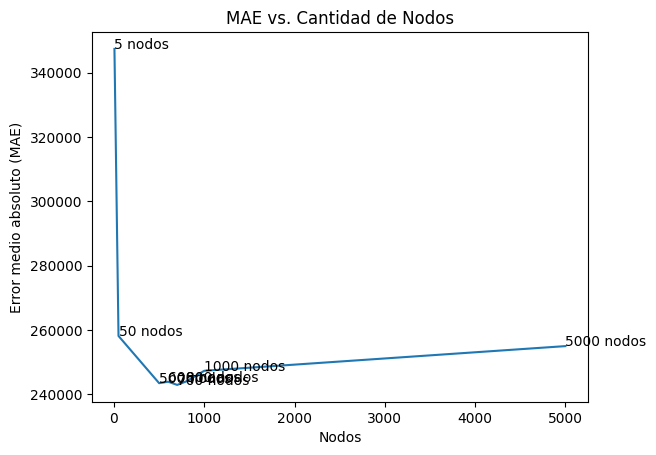

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a dataframe from the lists
data = pd.DataFrame({'MAE': maes, 'Nodos': hojas})

# Create the seaborn line plot
sns.lineplot(data=data, x='Nodos', y='MAE')

# Set the plot title and labels
plt.title('MAE vs. Cantidad de Nodos')
plt.xlabel('Nodos')
plt.ylabel('Error medio absoluto (MAE)')

for i in range(data.shape[0]):
    plt.text(data.Nodos[i], data.MAE[i], str(data.Nodos[i]) + " nodos")

# Show the plot
plt.show()

Con esto podemos concluir que 500 es la cantidad de nodos óptima.